Boston Housing Dataset, Introductory Exploration
in Python Interactive Notebook
By Brian Lesko 
Using Intro to Statistical Machine Learning with R
converted to python

This exercise is part of an introductory assignment for STAT 6500 and requires usage of the problematic dataset concerning Boston Housing. 

In [24]:
from sklearn import datasets # Importing the library
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


Lets Read about the Dataset

In [17]:
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

Lets Inspect what the data looks like.

In [22]:
import pandas as pd
df = pd.DataFrame(boston.data)

df.head(6)

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
5  0.02985   0.0  2.18  0.0  0.458  6.430  58.7  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
5  394.12  5.21

Looks like the names were dropped from the dataset when converted to a Dataframe from Pandas. I will try and correct this in the next step.

Next, Lets look at how many rows and columns of data are in the Boston Dataset

In [56]:
X = boston.data
print(X.shape);

y = boston.target
print(y.shape);

samples = df.shape[0]
features = df.shape[1]
print('num samples=',samples,', num features=',features,sep='') # row count

(506, 13)
(506,)
num samples=506, num features=13


Looks like 506 Rows, one for each home, and 13 columns, or features of the homes were recorded

Lets fix the pandas dataframe conversion

In [28]:
# The correct way to convert boston to a Pandas dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(6)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
5     18.7  394.12   5.21

Lets make some scatterplots of the features, or predictors

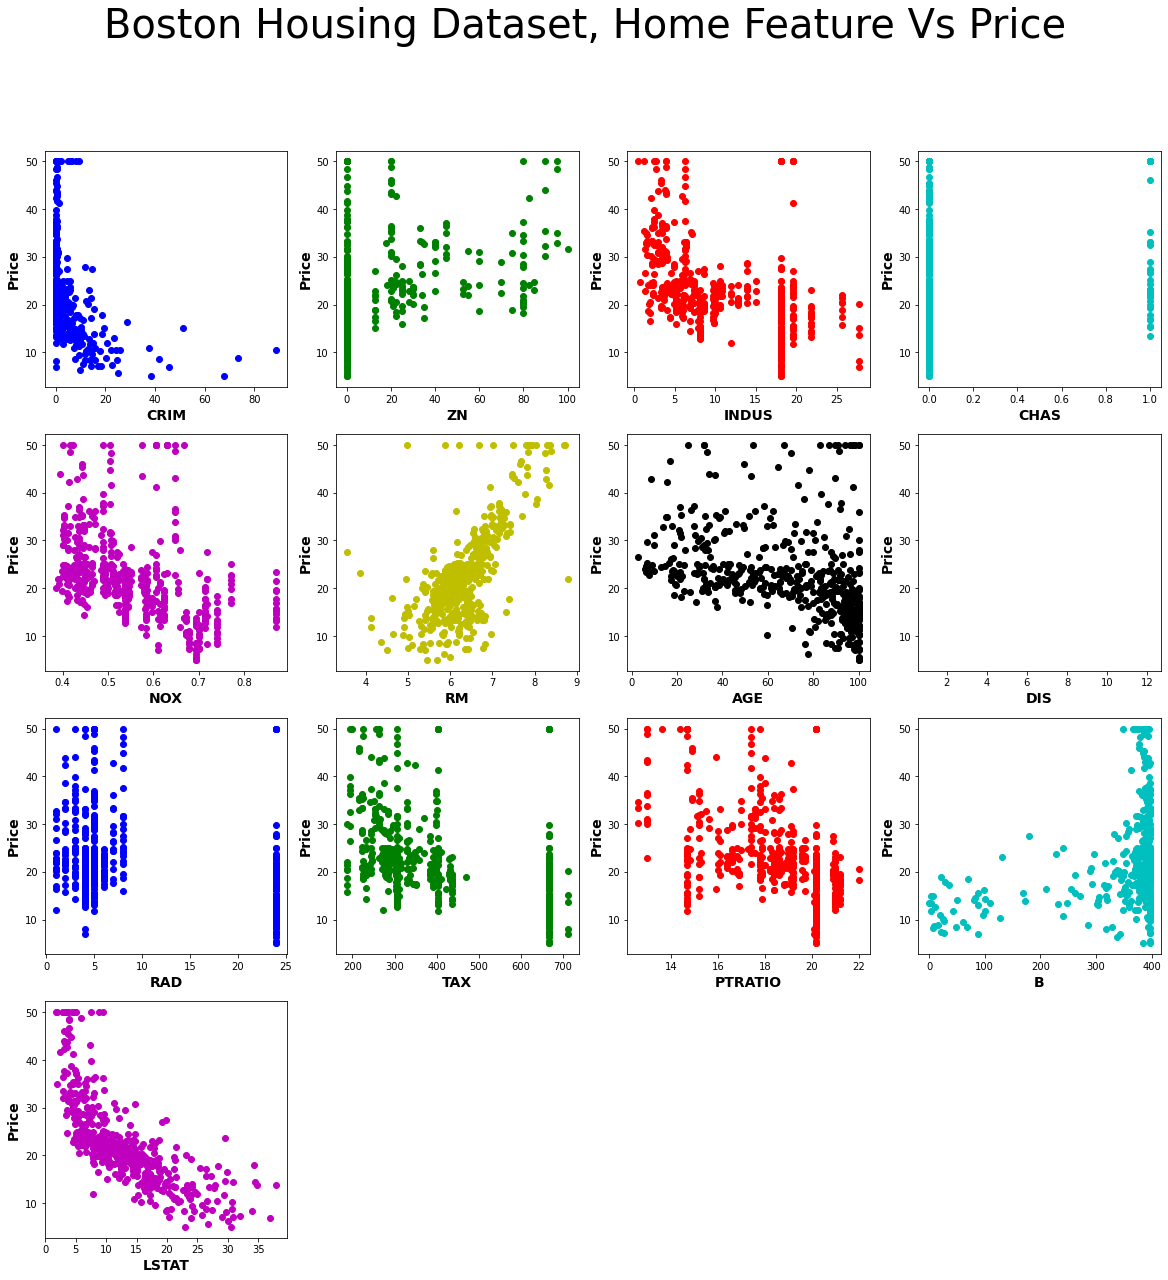

In [49]:
# Importing the matPlot library as plt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# create the figure and the axes objects
fig, axs = plt.subplots(4,4, figsize=(20,20))

# flatten the axes array so only one for loop is needed (avoid nesting)
axs = axs.flatten()

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm']
# iterate over the columns and create a scatter plot for each one
for i, column_name in enumerate(df.columns):
    axs[i].scatter(df[column_name], boston.target, c=colors[i])
    axs[i].set_xlabel(column_name, fontweight='bold', fontsize=14)
    axs[i].set_ylabel('Price', fontweight='bold', fontsize=14)

# Master Title
plt.suptitle("Boston Housing Dataset, Home Feature Vs Price", fontsize=40)
# plt.tight_layout()

# remove the empty axes
fig.delaxes(axs[-1]), fig.delaxes(axs[-2]), fig.delaxes(axs[-3])

plt.show()

Nice, there is a good relationship between some of the features and price of the home. For some variables however, there is not an obvious relationship. Specifically, a linnear relationship would work well for RM while a linear or exponential decay relationship would work for LSTAT. Interestingly, the DIS feature is showing no datapoints, this could be investigated further. Note that the variable LSTAT may be bias in the way data was collected, this likely contributes to the warning that this dataset is problematic

Looking at the CRIM feature using the DESC method of the boston object:

CRIM  :   per capita crime rate by town

The relationship here resembles an exponential decay, suggesting that as crime rate increases the home value decreases. Note that there are also a few other predictors that also have a negative relationship with Price and may thus also correlate with crime rate.

Some of the predictor scatter plots have potential outliers or clusters near the higher end of the range of the predictor, especially tax rate or RAD. 

Some homes bound the Charles River, this info is stored in the dummy variable CHAS

- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)



In [60]:
import numpy as np
x = df['CHAS']
samples = df.shape[0]
countOnRiver = np.mean(x==1)*samples
print('There are',countOnRiver, 'homes on the Charles river')

There are 35.0 homes on the Charles river


The Median pupil-teacher ration among the towns in this dataset

In [61]:
pupilTeacherMedian = np.median(df['PTRATIO'])
print('The Median Pupil Teacher ratio among the homes is',pupilTeacherMedian)

The Median Pupil Teacher ratio among the homes is 19.05


The Lowest median Value of owner occupied homes. This homes other feature values are, which compare lie where in the range for each feature

MEDV     Median value of owner-occupied homes in $1000's

In [72]:
#x = df['MEDV']
#minValue = np.min(x)
X = boston.data
boston.feature_names
print(X.shape);



(506, 13)


Seems that the data is missing the MEDV Home Values. 

Lets investigate rooms per dwelling, RM

In [85]:
x = df['RM']
countHomesWithOver7Rooms = np.mean(x>7)*samples
print('there are',countHomesWithOver7Rooms,'homes with more than 7 rooms')

countHomesWithOver8Rooms = np.mean(x>8)*samples
print('there are',countHomesWithOver8Rooms,'homes with more than 8 rooms')

there are 63.99999999999999 homes with more than 7 rooms
there are 13.0 homes with more than 8 rooms


There are only 13 homes out of 506 homes with more than 8 rooms! this is ~ 2.5% of the sample. 

For the next portion of the assignment, the prompt asks to predict crime rate (the target or response) based on the other features. This could lead to a deeper understanding of how this datasest or the associated Boston area is problematic

First, Lets create a method to return the RSS coefficients and R^2 values for a given pair

In [89]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       yhat = beta0 + beta1*x, 
    The function returns beta0, beta1 and rsq, where rsq is the coefficient of determination.
    """
    xm = np.mean(x)
    ym = np.mean(y)
    sxx = np.mean((x-xm)**2)
    syy = np.mean((y-ym)**2)
    syx = np.mean((y-ym)*(x-xm))
    beta1 = syx/sxx
    beta0 = ym - beta1*xm
    rsq = syx**2/sxx/syy

    # print(beta0,beta1,rsq)

    return beta0, beta1, rsq

Now lets combine the plotting code above with the RSS method defined directly above

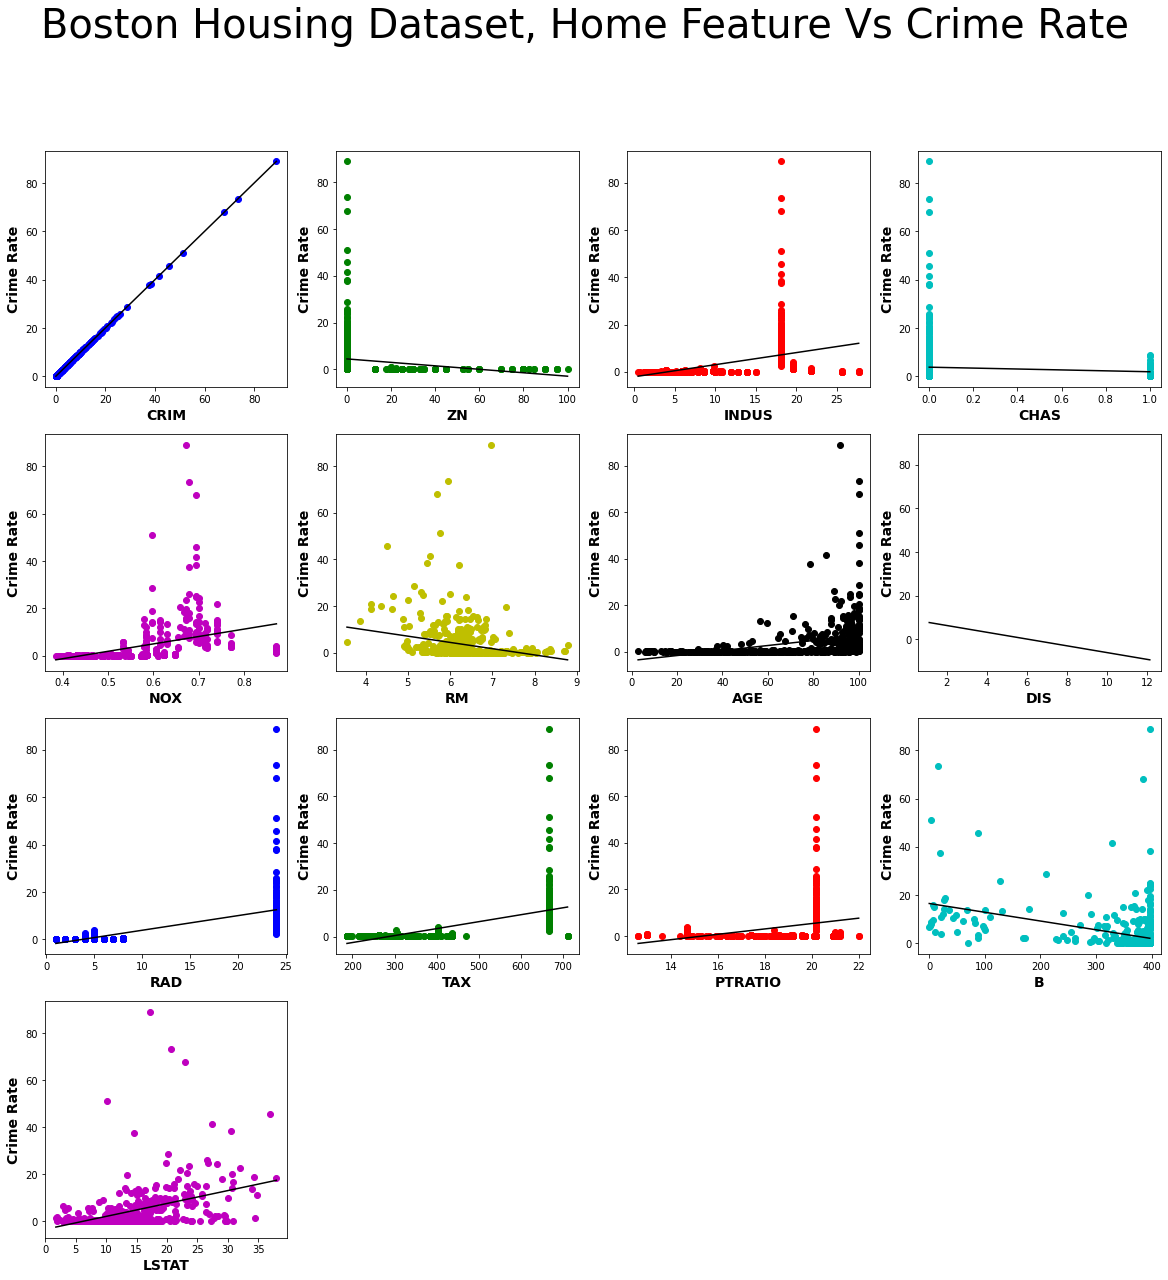

In [92]:
# Setting the new y variable
y = df['CRIM']

# create the figure and the axes objects
fig, axs = plt.subplots(4,4, figsize=(20,20))

# flatten the axes array so only one for loop is needed (avoid nesting)
axs = axs.flatten()

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm']
# iterate over the columns and create a scatter plot for each one
for i, column_name in enumerate(df.columns):
    # Plotting The datapoints
    axs[i].scatter(df[column_name], y, c=colors[i])

    # Calculating the Least Squares RSS
    x = df[column_name]
    isValid = x.notna()
    beta0 , beta1 , rsq = fit_linear(x[isValid],y[isValid])

    # Plotting the Least Squared Linear Regression Line
    xL = np.linspace(np.min(x),np.max(x),100)
    yL = beta0 + beta1*xL
    axs[i].plot(xL,yL,'k')

    axs[i].set_xlabel(column_name, fontweight='bold', fontsize=14)
    axs[i].set_ylabel('Crime Rate', fontweight='bold', fontsize=14)

# Master Title
plt.suptitle("Boston Housing Dataset, Home Feature Vs Crime Rate", fontsize=40)
# plt.tight_layout()

# remove the empty axes
fig.delaxes(axs[-1]), fig.delaxes(axs[-2]), fig.delaxes(axs[-3])

plt.show()

These plots show that certain properties are grouped in problematic ways! One of the highest tax rates has increasing crime rate. The same pattern appears with a group of pupil teach ratio, RAD, INDUS, and ZN. Among the other categories, the strength of linear relationships is questionable at best. 

Lets try Multiple Regression Next

More reading in necessary to continue the assignment

A new method will be needed

on page 128 of Intro to Statistical Learning

In [ ]:
# Multiple Linear Regression Model
# Which predictors can we reject the null hypothesis?